# Deep Hedging for a nonlinear generalized affine process - Bear put option.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import style
style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from mpl_toolkits.mplot3d import Axes3D
from Functions import *
from matplotlib import rcParams

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 

We first write a function to generate paths of the SDE, that we have given in (3.1),
$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t,~t\geq 0,\\
X_0 = x_0
$$
using the Euler-Maruyama Method, i.e., through
$$
X_{i+1} = X_i+(b_0+b_1 X_i) \Delta t_i +(a_0+a_1 X_i)^\gamma  \Delta W_i,~i=1,\dots,n
$$
with $\Delta t_i = T/n$ and $\Delta W_i = W_{(i+1)T/n}-W_{iT/n}$ and $X_0 = x_0$

Test it in a purely nonlinear setting:

$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t
$$

for 

\begin{align}
a_0 &\in [0.2,1.0] \\
a_1 &\in [0.5,0.7] \\
b_0 &\in [-0.3,0.3] \\
b_1 &\in [-0.2,0.2] \\
\gamma &\in [0.2,1.8]
\end{align}

Define Payoff of a Bear put option
$$
(13-S_{t_n})^+-(17-S_{t_n})^+
$$

In [3]:
T = 21 / 365
n = 21
a_0 = [0.2,1.0]
a_1 = [0.5,0.7]
b_0 = [-0.3,0.3]
b_1 = [-0.2,0.2]
gamma = [0.5,1.5]
x_0 = 15.
def derivative(path):
    return tf.nn.relu((x_0-2)-path[-1])-tf.nn.relu((x_0+2)-path[-1])

price, hedge = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 1000,l_r = 0.0075,BATCH_SIZE =256)

  1%|          | 11/1000 [00:07<11:34,  1.43it/s]

Iteration:10, Price of Hedge: -2.1181793212890625, Loss: 0.9827206134796143


  2%|▏         | 21/1000 [00:15<11:50,  1.38it/s]

Iteration:20, Price of Hedge: -2.119359254837036, Loss: 0.9277656078338623


  3%|▎         | 31/1000 [00:22<10:59,  1.47it/s]

Iteration:30, Price of Hedge: -2.141331434249878, Loss: 0.47628310322761536


  4%|▍         | 41/1000 [00:29<11:32,  1.38it/s]

Iteration:40, Price of Hedge: -2.161071300506592, Loss: 0.845880925655365


  5%|▌         | 51/1000 [00:36<10:52,  1.45it/s]

Iteration:50, Price of Hedge: -2.158527135848999, Loss: 1.1381937265396118


  6%|▌         | 61/1000 [00:43<11:40,  1.34it/s]

Iteration:60, Price of Hedge: -2.1388778686523438, Loss: 0.8015307188034058


  7%|▋         | 71/1000 [00:50<10:37,  1.46it/s]

Iteration:70, Price of Hedge: -2.136216402053833, Loss: 0.44314026832580566


  8%|▊         | 81/1000 [00:57<10:22,  1.48it/s]

Iteration:80, Price of Hedge: -2.1317081451416016, Loss: 0.6277279853820801


  9%|▉         | 91/1000 [01:04<10:35,  1.43it/s]

Iteration:90, Price of Hedge: -2.1497652530670166, Loss: 0.5285695195198059


 10%|█         | 101/1000 [01:12<11:32,  1.30it/s]

Iteration:100, Price of Hedge: -2.1650402545928955, Loss: 0.6679859757423401


 11%|█         | 111/1000 [01:19<10:20,  1.43it/s]

Iteration:110, Price of Hedge: -2.1762311458587646, Loss: 0.5152350664138794


 12%|█▏        | 121/1000 [01:26<10:03,  1.46it/s]

Iteration:120, Price of Hedge: -2.1804039478302, Loss: 0.661023736000061


 13%|█▎        | 131/1000 [01:33<10:21,  1.40it/s]

Iteration:130, Price of Hedge: -2.170396566390991, Loss: 0.4742995798587799


 14%|█▍        | 141/1000 [01:40<09:53,  1.45it/s]

Iteration:140, Price of Hedge: -2.1533899307250977, Loss: 0.41678789258003235


 15%|█▌        | 151/1000 [01:47<10:40,  1.33it/s]

Iteration:150, Price of Hedge: -2.1544041633605957, Loss: 0.4787508249282837


 16%|█▌        | 161/1000 [01:54<09:43,  1.44it/s]

Iteration:160, Price of Hedge: -2.1653051376342773, Loss: 0.41924721002578735


 17%|█▋        | 171/1000 [02:01<09:26,  1.46it/s]

Iteration:170, Price of Hedge: -2.1555025577545166, Loss: 0.3384256958961487


 18%|█▊        | 181/1000 [02:08<09:59,  1.37it/s]

Iteration:180, Price of Hedge: -2.156122922897339, Loss: 0.395560622215271


 19%|█▉        | 191/1000 [02:15<09:26,  1.43it/s]

Iteration:190, Price of Hedge: -2.171298027038574, Loss: 0.3592338562011719


 20%|██        | 201/1000 [02:23<09:24,  1.42it/s]

Iteration:200, Price of Hedge: -2.1684234142303467, Loss: 0.29482144117355347


 21%|██        | 211/1000 [02:30<09:04,  1.45it/s]

Iteration:210, Price of Hedge: -2.1557281017303467, Loss: 0.33208951354026794


 22%|██▏       | 221/1000 [02:37<09:14,  1.40it/s]

Iteration:220, Price of Hedge: -2.1455037593841553, Loss: 0.3063015341758728


 23%|██▎       | 231/1000 [02:44<08:47,  1.46it/s]

Iteration:230, Price of Hedge: -2.1664113998413086, Loss: 0.35182687640190125


 24%|██▍       | 241/1000 [02:51<09:29,  1.33it/s]

Iteration:240, Price of Hedge: -2.179621696472168, Loss: 0.2897524833679199


 25%|██▌       | 251/1000 [02:58<08:32,  1.46it/s]

Iteration:250, Price of Hedge: -2.1712279319763184, Loss: 0.2817753851413727


 26%|██▌       | 261/1000 [03:05<08:27,  1.46it/s]

Iteration:260, Price of Hedge: -2.1547985076904297, Loss: 0.2696714401245117


 27%|██▋       | 271/1000 [03:12<08:24,  1.44it/s]

Iteration:270, Price of Hedge: -2.167405605316162, Loss: 0.23443438112735748


 28%|██▊       | 281/1000 [03:19<08:08,  1.47it/s]

Iteration:280, Price of Hedge: -2.183004379272461, Loss: 0.4300500750541687


 29%|██▉       | 291/1000 [03:26<08:37,  1.37it/s]

Iteration:290, Price of Hedge: -2.17846941947937, Loss: 0.3215153217315674


 30%|███       | 301/1000 [03:33<08:18,  1.40it/s]

Iteration:300, Price of Hedge: -2.1552724838256836, Loss: 0.27754807472229004


 31%|███       | 311/1000 [03:41<08:35,  1.34it/s]

Iteration:310, Price of Hedge: -2.1505846977233887, Loss: 0.30617737770080566


 32%|███▏      | 321/1000 [03:48<08:10,  1.38it/s]

Iteration:320, Price of Hedge: -2.1575608253479004, Loss: 0.24827685952186584


 33%|███▎      | 331/1000 [03:55<08:52,  1.26it/s]

Iteration:330, Price of Hedge: -2.152132749557495, Loss: 0.2518750727176666


 34%|███▍      | 341/1000 [04:02<07:37,  1.44it/s]

Iteration:340, Price of Hedge: -2.150357484817505, Loss: 0.27360302209854126


 35%|███▌      | 351/1000 [04:10<07:41,  1.41it/s]

Iteration:350, Price of Hedge: -2.1471498012542725, Loss: 0.28699612617492676


 36%|███▌      | 361/1000 [04:17<07:20,  1.45it/s]

Iteration:360, Price of Hedge: -2.1433589458465576, Loss: 0.29496288299560547


 37%|███▋      | 371/1000 [04:24<07:22,  1.42it/s]

Iteration:370, Price of Hedge: -2.141946315765381, Loss: 0.35757386684417725


 38%|███▊      | 381/1000 [04:31<07:17,  1.41it/s]

Iteration:380, Price of Hedge: -2.162529230117798, Loss: 0.32335054874420166


 39%|███▉      | 391/1000 [04:38<07:00,  1.45it/s]

Iteration:390, Price of Hedge: -2.1775519847869873, Loss: 0.2968398928642273


 40%|████      | 401/1000 [04:45<07:09,  1.40it/s]

Iteration:400, Price of Hedge: -2.1623075008392334, Loss: 0.3070606589317322


 41%|████      | 411/1000 [04:52<06:42,  1.46it/s]

Iteration:410, Price of Hedge: -2.1413357257843018, Loss: 0.2560980021953583


 42%|████▏     | 421/1000 [04:59<07:17,  1.32it/s]

Iteration:420, Price of Hedge: -2.1470789909362793, Loss: 0.24360521137714386


 43%|████▎     | 431/1000 [05:06<06:30,  1.46it/s]

Iteration:430, Price of Hedge: -2.171938419342041, Loss: 0.26524266600608826


 44%|████▍     | 441/1000 [05:13<06:20,  1.47it/s]

Iteration:440, Price of Hedge: -2.1675405502319336, Loss: 0.24779468774795532


 45%|████▌     | 451/1000 [05:20<06:17,  1.45it/s]

Iteration:450, Price of Hedge: -2.1623380184173584, Loss: 0.3400590419769287


 46%|████▌     | 461/1000 [05:27<06:12,  1.45it/s]

Iteration:460, Price of Hedge: -2.163424015045166, Loss: 0.3261873126029968


 47%|████▋     | 471/1000 [05:34<06:12,  1.42it/s]

Iteration:470, Price of Hedge: -2.157111406326294, Loss: 0.284265398979187


 48%|████▊     | 481/1000 [05:41<05:55,  1.46it/s]

Iteration:480, Price of Hedge: -2.1644227504730225, Loss: 0.28746986389160156


 49%|████▉     | 491/1000 [05:48<06:21,  1.33it/s]

Iteration:490, Price of Hedge: -2.1623005867004395, Loss: 0.2647867798805237


 50%|█████     | 501/1000 [05:55<05:38,  1.47it/s]

Iteration:500, Price of Hedge: -2.149847984313965, Loss: 0.3017007112503052


 51%|█████     | 511/1000 [06:02<05:57,  1.37it/s]

Iteration:510, Price of Hedge: -2.1484105587005615, Loss: 0.2944939434528351


 52%|█████▏    | 521/1000 [06:09<05:40,  1.41it/s]

Iteration:520, Price of Hedge: -2.1647844314575195, Loss: 0.29490339756011963


 53%|█████▎    | 531/1000 [06:16<05:33,  1.41it/s]

Iteration:530, Price of Hedge: -2.1611688137054443, Loss: 0.4056146740913391


 54%|█████▍    | 541/1000 [06:24<05:17,  1.44it/s]

Iteration:540, Price of Hedge: -2.160262107849121, Loss: 0.2740783989429474


 55%|█████▌    | 551/1000 [06:31<05:06,  1.47it/s]

Iteration:550, Price of Hedge: -2.148526430130005, Loss: 0.2551572620868683


 56%|█████▌    | 561/1000 [06:38<05:15,  1.39it/s]

Iteration:560, Price of Hedge: -2.156193971633911, Loss: 0.24546559154987335


 57%|█████▋    | 571/1000 [06:45<05:00,  1.43it/s]

Iteration:570, Price of Hedge: -2.167166233062744, Loss: 0.23975589871406555


 58%|█████▊    | 581/1000 [06:52<05:20,  1.31it/s]

Iteration:580, Price of Hedge: -2.165698528289795, Loss: 0.24083013832569122


 59%|█████▉    | 591/1000 [06:59<04:50,  1.41it/s]

Iteration:590, Price of Hedge: -2.161874294281006, Loss: 0.2338860183954239


 60%|██████    | 601/1000 [07:06<04:50,  1.37it/s]

Iteration:600, Price of Hedge: -2.1509592533111572, Loss: 0.27384912967681885


 61%|██████    | 611/1000 [07:14<04:37,  1.40it/s]

Iteration:610, Price of Hedge: -2.159214973449707, Loss: 0.2750084102153778


 62%|██████▏   | 621/1000 [07:20<04:19,  1.46it/s]

Iteration:620, Price of Hedge: -2.157493829727173, Loss: 0.27172255516052246


 63%|██████▎   | 631/1000 [07:28<04:16,  1.44it/s]

Iteration:630, Price of Hedge: -2.1587820053100586, Loss: 0.2963036298751831


 64%|██████▍   | 641/1000 [07:34<04:04,  1.47it/s]

Iteration:640, Price of Hedge: -2.153667449951172, Loss: 0.2738041877746582


 65%|██████▌   | 651/1000 [07:42<04:06,  1.42it/s]

Iteration:650, Price of Hedge: -2.1502156257629395, Loss: 0.2676241099834442


 66%|██████▌   | 661/1000 [07:48<03:58,  1.42it/s]

Iteration:660, Price of Hedge: -2.1612954139709473, Loss: 0.2433992326259613


 67%|██████▋   | 671/1000 [07:56<04:05,  1.34it/s]

Iteration:670, Price of Hedge: -2.168405532836914, Loss: 0.22106733918190002


 68%|██████▊   | 681/1000 [08:03<03:40,  1.45it/s]

Iteration:680, Price of Hedge: -2.174563407897949, Loss: 0.2916150987148285


 69%|██████▉   | 691/1000 [08:09<03:34,  1.44it/s]

Iteration:690, Price of Hedge: -2.1592612266540527, Loss: 0.221029594540596


 70%|███████   | 701/1000 [08:16<03:23,  1.47it/s]

Iteration:700, Price of Hedge: -2.149308443069458, Loss: 0.3897113800048828


 71%|███████   | 711/1000 [08:23<03:18,  1.46it/s]

Iteration:710, Price of Hedge: -2.15564227104187, Loss: 0.3049393892288208


 72%|███████▏  | 721/1000 [08:30<03:14,  1.44it/s]

Iteration:720, Price of Hedge: -2.1690776348114014, Loss: 0.3115765452384949


 73%|███████▎  | 731/1000 [08:37<03:04,  1.46it/s]

Iteration:730, Price of Hedge: -2.156872034072876, Loss: 0.2251090407371521


 74%|███████▍  | 741/1000 [08:45<03:05,  1.40it/s]

Iteration:740, Price of Hedge: -2.1580698490142822, Loss: 0.24338418245315552


 75%|███████▌  | 751/1000 [08:51<02:51,  1.46it/s]

Iteration:750, Price of Hedge: -2.1649158000946045, Loss: 0.28396379947662354


 76%|███████▌  | 761/1000 [08:59<03:01,  1.32it/s]

Iteration:760, Price of Hedge: -2.162053346633911, Loss: 0.2779043912887573


 77%|███████▋  | 771/1000 [09:07<03:04,  1.24it/s]

Iteration:770, Price of Hedge: -2.150434970855713, Loss: 0.31584012508392334


 78%|███████▊  | 781/1000 [09:16<03:01,  1.21it/s]

Iteration:780, Price of Hedge: -2.1618869304656982, Loss: 0.24148519337177277


 79%|███████▉  | 791/1000 [09:23<02:23,  1.46it/s]

Iteration:790, Price of Hedge: -2.180556058883667, Loss: 0.33524900674819946


 80%|████████  | 801/1000 [09:30<02:23,  1.38it/s]

Iteration:800, Price of Hedge: -2.1466689109802246, Loss: 0.2529338002204895


 81%|████████  | 811/1000 [09:37<02:10,  1.45it/s]

Iteration:810, Price of Hedge: -2.129384994506836, Loss: 0.23727545142173767


 82%|████████▏ | 821/1000 [09:44<02:09,  1.39it/s]

Iteration:820, Price of Hedge: -2.1444225311279297, Loss: 0.2962946891784668


 83%|████████▎ | 831/1000 [09:52<02:10,  1.29it/s]

Iteration:830, Price of Hedge: -2.1693403720855713, Loss: 0.2402215600013733


 84%|████████▍ | 841/1000 [09:59<01:52,  1.41it/s]

Iteration:840, Price of Hedge: -2.179054021835327, Loss: 0.2858542799949646


 85%|████████▌ | 851/1000 [10:06<01:45,  1.41it/s]

Iteration:850, Price of Hedge: -2.1511778831481934, Loss: 0.32709887623786926


 86%|████████▌ | 861/1000 [10:13<01:35,  1.46it/s]

Iteration:860, Price of Hedge: -2.1436753273010254, Loss: 0.2710835933685303


 87%|████████▋ | 871/1000 [10:21<01:38,  1.30it/s]

Iteration:870, Price of Hedge: -2.145183563232422, Loss: 0.25598594546318054


 88%|████████▊ | 881/1000 [10:28<01:22,  1.44it/s]

Iteration:880, Price of Hedge: -2.1587963104248047, Loss: 0.2416820079088211


 89%|████████▉ | 891/1000 [10:35<01:21,  1.33it/s]

Iteration:890, Price of Hedge: -2.156921148300171, Loss: 0.26295042037963867


 90%|█████████ | 901/1000 [10:42<01:08,  1.45it/s]

Iteration:900, Price of Hedge: -2.1639790534973145, Loss: 0.28651654720306396


 91%|█████████ | 911/1000 [10:49<01:01,  1.46it/s]

Iteration:910, Price of Hedge: -2.1596810817718506, Loss: 0.3137521743774414


 92%|█████████▏| 921/1000 [10:56<00:56,  1.41it/s]

Iteration:920, Price of Hedge: -2.153251886367798, Loss: 0.26342663168907166


 93%|█████████▎| 931/1000 [11:03<00:47,  1.44it/s]

Iteration:930, Price of Hedge: -2.1577091217041016, Loss: 0.2445259988307953


 94%|█████████▍| 941/1000 [11:10<00:41,  1.42it/s]

Iteration:940, Price of Hedge: -2.1744906902313232, Loss: 0.2553945779800415


 95%|█████████▌| 951/1000 [11:17<00:33,  1.46it/s]

Iteration:950, Price of Hedge: -2.1768484115600586, Loss: 0.2998797297477722


 96%|█████████▌| 961/1000 [11:24<00:28,  1.36it/s]

Iteration:960, Price of Hedge: -2.1701526641845703, Loss: 0.20538924634456635


 97%|█████████▋| 971/1000 [11:31<00:19,  1.46it/s]

Iteration:970, Price of Hedge: -2.1592702865600586, Loss: 0.22915005683898926


 98%|█████████▊| 981/1000 [11:38<00:14,  1.33it/s]

Iteration:980, Price of Hedge: -2.1573052406311035, Loss: 0.25234508514404297


 99%|█████████▉| 991/1000 [11:46<00:06,  1.43it/s]

Iteration:990, Price of Hedge: -2.1760456562042236, Loss: 0.21343855559825897


100%|██████████| 1000/1000 [11:52<00:00,  1.40it/s]


We can now illustrate the computed hedging strategy in a graph

In [4]:
labelsize = 18
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 

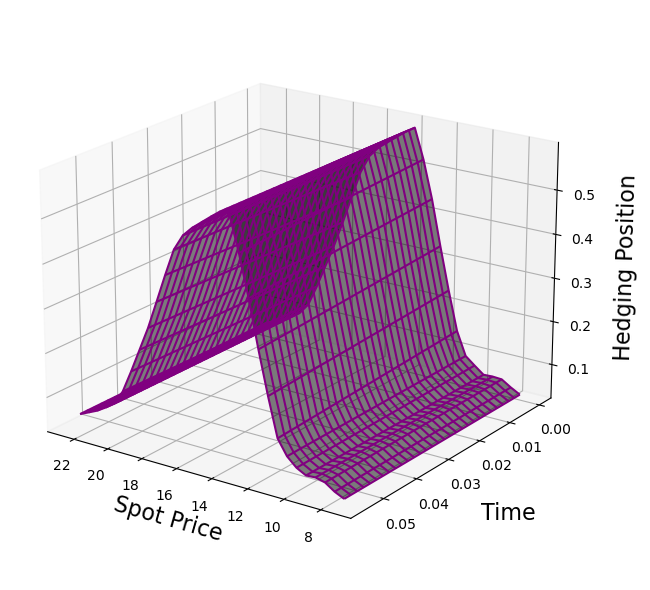

In [9]:
nr_discrete_points = 30 
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
grid = np.zeros((nr_discrete_points,nr_discrete_points))
for i in range(len(times)):
    for j in range(len(values)):
        grid[i,j] = hedge([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y , grid,color = "black",alpha = 0.5)
ax.plot_wireframe(X, Y , grid,color = "purple",label = "Hedging strategy with uncertain parameters")

ax.view_init(20, 125)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.tight_layout()

plt.show()

We now look at the Hedging Error of this strategy

In [10]:
BATCH_SIZE = 50000 
t_k = np.linspace(0,T,n+1)
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

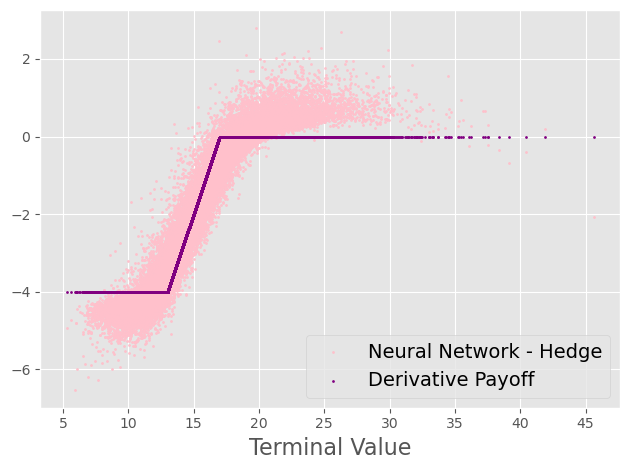

In [12]:
style.use('ggplot')
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "pink",label = "Neural Network - Hedge",s=2)
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "purple",label = "Derivative Payoff",s=2)
plt.xlabel("Terminal Value", fontsize=16)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


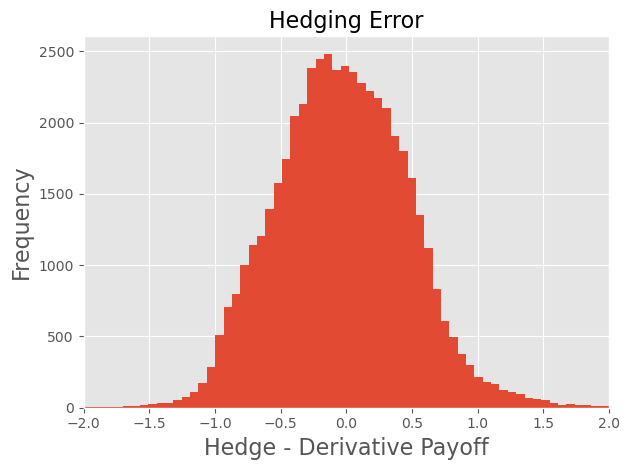

In [13]:
hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
plt.hist(hedging_error,100)
plt.xlim([-2,2])
plt.xlabel("Hedge - Derivative Payoff", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Hedging Error", fontsize=16)
plt.tight_layout()
plt.show()

## Training of a hedging strategy with fixed parameters that lie in the middle of each of the already specified parameter intervals

In [14]:
T = 21 / 365
n = 21
a_0_fix = [0.6,0.6]
a_1_fix = [0.5,0.5]
b_0_fix = [0,0]
b_1_fix = [0,0]
gamma_fix = [1,1]
x_0 = 15.
def derivative(path):
    return tf.nn.relu((x_0-2)-path[-1])-tf.nn.relu((x_0+2)-path[-1])

price_fix, hedge_fix = optimal_hedge(derivative,a_0_fix,a_1_fix,b_0_fix,b_1_fix,gamma_fix,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 1000,l_r = 0.0075,BATCH_SIZE =256)

  1%|          | 11/1000 [00:08<11:39,  1.41it/s]

Iteration:10, Price of Hedge: -2.025719165802002, Loss: 0.34701019525527954


  2%|▏         | 21/1000 [00:15<11:49,  1.38it/s]

Iteration:20, Price of Hedge: -2.044898748397827, Loss: 0.5520840883255005


  3%|▎         | 31/1000 [00:22<11:42,  1.38it/s]

Iteration:30, Price of Hedge: -2.0538532733917236, Loss: 0.28168126940727234


  4%|▍         | 41/1000 [00:30<11:37,  1.38it/s]

Iteration:40, Price of Hedge: -2.0602385997772217, Loss: 0.18403369188308716


  5%|▌         | 51/1000 [00:37<11:41,  1.35it/s]

Iteration:50, Price of Hedge: -2.059314012527466, Loss: 0.16400015354156494


  6%|▌         | 61/1000 [00:45<11:32,  1.36it/s]

Iteration:60, Price of Hedge: -2.049844741821289, Loss: 0.23529988527297974


  7%|▋         | 71/1000 [00:55<16:14,  1.05s/it]

Iteration:70, Price of Hedge: -2.039069890975952, Loss: 0.3175048232078552


  8%|▊         | 81/1000 [01:04<14:17,  1.07it/s]

Iteration:80, Price of Hedge: -2.039707899093628, Loss: 0.24917885661125183


  9%|▉         | 91/1000 [01:12<13:15,  1.14it/s]

Iteration:90, Price of Hedge: -2.042893171310425, Loss: 0.2453337013721466


 10%|█         | 101/1000 [01:20<11:59,  1.25it/s]

Iteration:100, Price of Hedge: -2.0459892749786377, Loss: 0.1806747019290924


 11%|█         | 111/1000 [01:28<11:48,  1.25it/s]

Iteration:110, Price of Hedge: -2.0531437397003174, Loss: 0.35652709007263184


 12%|█▏        | 121/1000 [01:37<14:05,  1.04it/s]

Iteration:120, Price of Hedge: -2.0588974952697754, Loss: 0.41256916522979736


 13%|█▎        | 131/1000 [01:46<12:11,  1.19it/s]

Iteration:130, Price of Hedge: -2.0641095638275146, Loss: 0.21773195266723633


 14%|█▍        | 141/1000 [01:54<11:49,  1.21it/s]

Iteration:140, Price of Hedge: -2.064331531524658, Loss: 0.23813799023628235


 15%|█▌        | 151/1000 [02:02<11:44,  1.21it/s]

Iteration:150, Price of Hedge: -2.061298131942749, Loss: 0.1314188539981842


 16%|█▌        | 161/1000 [02:10<12:49,  1.09it/s]

Iteration:160, Price of Hedge: -2.0587141513824463, Loss: 0.21802610158920288


 17%|█▋        | 171/1000 [02:18<11:22,  1.21it/s]

Iteration:170, Price of Hedge: -2.0601987838745117, Loss: 0.26181453466415405


 18%|█▊        | 181/1000 [02:26<11:58,  1.14it/s]

Iteration:180, Price of Hedge: -2.0565199851989746, Loss: 0.26972469687461853


 19%|█▉        | 191/1000 [02:35<10:29,  1.29it/s]

Iteration:190, Price of Hedge: -2.054177761077881, Loss: 0.21834179759025574


 20%|██        | 201/1000 [02:43<12:02,  1.11it/s]

Iteration:200, Price of Hedge: -2.0566608905792236, Loss: 0.13639645278453827


 21%|██        | 211/1000 [02:51<09:46,  1.34it/s]

Iteration:210, Price of Hedge: -2.050874710083008, Loss: 0.16152408719062805


 22%|██▏       | 221/1000 [02:59<11:01,  1.18it/s]

Iteration:220, Price of Hedge: -2.050057888031006, Loss: 0.2038942277431488


 23%|██▎       | 231/1000 [03:07<11:03,  1.16it/s]

Iteration:230, Price of Hedge: -2.0541234016418457, Loss: 0.23009903728961945


 24%|██▍       | 241/1000 [03:17<11:51,  1.07it/s]

Iteration:240, Price of Hedge: -2.0513923168182373, Loss: 0.18298445641994476


 25%|██▌       | 251/1000 [03:25<10:37,  1.18it/s]

Iteration:250, Price of Hedge: -2.0567827224731445, Loss: 0.19726359844207764


 26%|██▌       | 261/1000 [03:33<10:17,  1.20it/s]

Iteration:260, Price of Hedge: -2.0540928840637207, Loss: 0.16943401098251343


 27%|██▋       | 271/1000 [03:42<09:30,  1.28it/s]

Iteration:270, Price of Hedge: -2.0516464710235596, Loss: 0.22622795403003693


 28%|██▊       | 281/1000 [03:50<09:01,  1.33it/s]

Iteration:280, Price of Hedge: -2.0596306324005127, Loss: 0.22004784643650055


 29%|██▉       | 291/1000 [03:58<09:23,  1.26it/s]

Iteration:290, Price of Hedge: -2.059499740600586, Loss: 0.23308616876602173


 30%|███       | 301/1000 [04:07<10:13,  1.14it/s]

Iteration:300, Price of Hedge: -2.065218210220337, Loss: 0.19508415460586548


 31%|███       | 311/1000 [04:15<08:59,  1.28it/s]

Iteration:310, Price of Hedge: -2.0587568283081055, Loss: 0.17521393299102783


 32%|███▏      | 321/1000 [04:25<11:21,  1.00s/it]

Iteration:320, Price of Hedge: -2.057612895965576, Loss: 0.1801363080739975


 33%|███▎      | 331/1000 [04:33<10:23,  1.07it/s]

Iteration:330, Price of Hedge: -2.05604887008667, Loss: 0.18673376739025116


 34%|███▍      | 341/1000 [04:41<09:03,  1.21it/s]

Iteration:340, Price of Hedge: -2.0532143115997314, Loss: 0.21273520588874817


 35%|███▌      | 351/1000 [04:51<12:15,  1.13s/it]

Iteration:350, Price of Hedge: -2.048457145690918, Loss: 0.19786325097084045


 36%|███▌      | 361/1000 [05:00<08:41,  1.23it/s]

Iteration:360, Price of Hedge: -2.0638246536254883, Loss: 0.17467166483402252


 37%|███▋      | 371/1000 [05:08<08:46,  1.20it/s]

Iteration:370, Price of Hedge: -2.0639805793762207, Loss: 0.20266637206077576


 38%|███▊      | 381/1000 [05:16<07:49,  1.32it/s]

Iteration:380, Price of Hedge: -2.064845085144043, Loss: 0.25091296434402466


 39%|███▉      | 391/1000 [05:28<10:20,  1.02s/it]

Iteration:390, Price of Hedge: -2.0623998641967773, Loss: 0.20276710391044617


 40%|████      | 401/1000 [05:35<07:12,  1.39it/s]

Iteration:400, Price of Hedge: -2.0588183403015137, Loss: 0.2028072476387024


 41%|████      | 411/1000 [05:44<08:09,  1.20it/s]

Iteration:410, Price of Hedge: -2.0443837642669678, Loss: 0.1790693998336792


 42%|████▏     | 421/1000 [05:52<08:47,  1.10it/s]

Iteration:420, Price of Hedge: -2.051016330718994, Loss: 0.14579910039901733


 43%|████▎     | 431/1000 [06:00<06:54,  1.37it/s]

Iteration:430, Price of Hedge: -2.056384563446045, Loss: 0.16601888835430145


 44%|████▍     | 441/1000 [06:07<06:18,  1.48it/s]

Iteration:440, Price of Hedge: -2.05619478225708, Loss: 0.2879459857940674


 45%|████▌     | 451/1000 [06:14<06:17,  1.46it/s]

Iteration:450, Price of Hedge: -2.0474846363067627, Loss: 0.16014540195465088


 46%|████▌     | 461/1000 [06:21<06:14,  1.44it/s]

Iteration:460, Price of Hedge: -2.048478126525879, Loss: 0.171897292137146


 47%|████▋     | 471/1000 [06:28<06:10,  1.43it/s]

Iteration:470, Price of Hedge: -2.0540573596954346, Loss: 0.19680866599082947


 48%|████▊     | 481/1000 [06:35<05:54,  1.47it/s]

Iteration:480, Price of Hedge: -2.0486373901367188, Loss: 0.20625554025173187


 49%|████▉     | 491/1000 [06:42<06:04,  1.40it/s]

Iteration:490, Price of Hedge: -2.0547072887420654, Loss: 0.20312395691871643


 50%|█████     | 501/1000 [06:49<05:41,  1.46it/s]

Iteration:500, Price of Hedge: -2.0628957748413086, Loss: 0.19078601896762848


 51%|█████     | 511/1000 [06:56<05:45,  1.41it/s]

Iteration:510, Price of Hedge: -2.0537703037261963, Loss: 0.22841084003448486


 52%|█████▏    | 521/1000 [07:03<05:30,  1.45it/s]

Iteration:520, Price of Hedge: -2.0530881881713867, Loss: 0.1492723524570465


 53%|█████▎    | 531/1000 [07:10<05:17,  1.48it/s]

Iteration:530, Price of Hedge: -2.049358606338501, Loss: 0.1503537893295288


 54%|█████▍    | 541/1000 [07:17<05:18,  1.44it/s]

Iteration:540, Price of Hedge: -2.0580902099609375, Loss: 0.1701539158821106


 55%|█████▌    | 551/1000 [07:24<05:08,  1.45it/s]

Iteration:550, Price of Hedge: -2.0659334659576416, Loss: 0.17867761850357056


 56%|█████▌    | 561/1000 [07:31<05:15,  1.39it/s]

Iteration:560, Price of Hedge: -2.0655457973480225, Loss: 0.18769414722919464


 57%|█████▋    | 571/1000 [07:38<04:57,  1.44it/s]

Iteration:570, Price of Hedge: -2.056187868118286, Loss: 0.18778571486473083


 58%|█████▊    | 581/1000 [07:45<05:07,  1.36it/s]

Iteration:580, Price of Hedge: -2.053119421005249, Loss: 0.21645432710647583


 59%|█████▉    | 591/1000 [07:52<04:39,  1.46it/s]

Iteration:590, Price of Hedge: -2.0539517402648926, Loss: 0.250582218170166


 60%|██████    | 601/1000 [07:58<04:39,  1.43it/s]

Iteration:600, Price of Hedge: -2.057281255722046, Loss: 0.2075650990009308


 61%|██████    | 611/1000 [08:06<04:27,  1.45it/s]

Iteration:610, Price of Hedge: -2.0655698776245117, Loss: 0.1821689009666443


 62%|██████▏   | 621/1000 [08:12<04:21,  1.45it/s]

Iteration:620, Price of Hedge: -2.0728471279144287, Loss: 0.1673668920993805


 63%|██████▎   | 631/1000 [08:20<04:20,  1.42it/s]

Iteration:630, Price of Hedge: -2.065298318862915, Loss: 0.216218039393425


 64%|██████▍   | 641/1000 [08:26<04:14,  1.41it/s]

Iteration:640, Price of Hedge: -2.0532219409942627, Loss: 0.1402980089187622


 65%|██████▌   | 651/1000 [08:34<04:26,  1.31it/s]

Iteration:650, Price of Hedge: -2.0527052879333496, Loss: 0.14931149780750275


 66%|██████▌   | 661/1000 [08:41<04:01,  1.40it/s]

Iteration:660, Price of Hedge: -2.0464940071105957, Loss: 0.13136900961399078


 67%|██████▋   | 671/1000 [08:48<04:12,  1.30it/s]

Iteration:670, Price of Hedge: -2.0465800762176514, Loss: 0.12190064042806625


 68%|██████▊   | 681/1000 [08:55<03:38,  1.46it/s]

Iteration:680, Price of Hedge: -2.0529439449310303, Loss: 0.12018919736146927


 69%|██████▉   | 691/1000 [09:02<03:30,  1.46it/s]

Iteration:690, Price of Hedge: -2.057541847229004, Loss: 0.09207239747047424


 70%|███████   | 701/1000 [09:09<03:26,  1.45it/s]

Iteration:700, Price of Hedge: -2.046865463256836, Loss: 0.10196438431739807


 71%|███████   | 711/1000 [09:16<03:17,  1.46it/s]

Iteration:710, Price of Hedge: -2.044323444366455, Loss: 0.12705346941947937


 72%|███████▏  | 721/1000 [09:23<03:19,  1.40it/s]

Iteration:720, Price of Hedge: -2.059166193008423, Loss: 0.1361810714006424


 73%|███████▎  | 731/1000 [09:30<03:03,  1.46it/s]

Iteration:730, Price of Hedge: -2.0647311210632324, Loss: 0.16197103261947632


 74%|███████▍  | 741/1000 [09:37<03:13,  1.34it/s]

Iteration:740, Price of Hedge: -2.062445878982544, Loss: 0.08569449931383133


 75%|███████▌  | 751/1000 [09:44<02:51,  1.45it/s]

Iteration:750, Price of Hedge: -2.0621345043182373, Loss: 0.15555475652217865


 76%|███████▌  | 761/1000 [09:51<02:45,  1.44it/s]

Iteration:760, Price of Hedge: -2.051126718521118, Loss: 0.07966980338096619


 77%|███████▋  | 771/1000 [09:58<02:40,  1.42it/s]

Iteration:770, Price of Hedge: -2.048975944519043, Loss: 0.11338590085506439


 78%|███████▊  | 781/1000 [10:06<02:44,  1.33it/s]

Iteration:780, Price of Hedge: -2.0472679138183594, Loss: 0.08587130159139633


 79%|███████▉  | 791/1000 [10:14<02:39,  1.31it/s]

Iteration:790, Price of Hedge: -2.0531158447265625, Loss: 0.13479432463645935


 80%|████████  | 801/1000 [10:21<02:26,  1.36it/s]

Iteration:800, Price of Hedge: -2.0550339221954346, Loss: 0.0973004549741745


 81%|████████  | 811/1000 [10:29<02:15,  1.40it/s]

Iteration:810, Price of Hedge: -2.0621161460876465, Loss: 0.10026777535676956


 82%|████████▏ | 821/1000 [10:36<02:07,  1.40it/s]

Iteration:820, Price of Hedge: -2.055793523788452, Loss: 0.10158851742744446


 83%|████████▎ | 831/1000 [10:43<02:02,  1.38it/s]

Iteration:830, Price of Hedge: -2.047196626663208, Loss: 0.08001017570495605


 84%|████████▍ | 841/1000 [10:50<01:50,  1.44it/s]

Iteration:840, Price of Hedge: -2.0455994606018066, Loss: 0.09979060292243958


 85%|████████▌ | 851/1000 [10:58<01:58,  1.26it/s]

Iteration:850, Price of Hedge: -2.0551817417144775, Loss: 0.062480080872774124


 86%|████████▌ | 861/1000 [11:05<01:38,  1.41it/s]

Iteration:860, Price of Hedge: -2.0609312057495117, Loss: 0.08224157989025116


 87%|████████▋ | 871/1000 [11:13<02:02,  1.05it/s]

Iteration:870, Price of Hedge: -2.0532431602478027, Loss: 0.06976574659347534


 88%|████████▊ | 881/1000 [11:20<01:23,  1.43it/s]

Iteration:880, Price of Hedge: -2.0547423362731934, Loss: 0.07932975888252258


 89%|████████▉ | 891/1000 [11:27<01:16,  1.42it/s]

Iteration:890, Price of Hedge: -2.0487253665924072, Loss: 0.14044645428657532


 90%|█████████ | 901/1000 [11:34<01:08,  1.45it/s]

Iteration:900, Price of Hedge: -2.056568145751953, Loss: 0.11293590068817139


 91%|█████████ | 911/1000 [11:41<01:00,  1.46it/s]

Iteration:910, Price of Hedge: -2.059861183166504, Loss: 0.0555582195520401


 92%|█████████▏| 921/1000 [11:48<00:54,  1.44it/s]

Iteration:920, Price of Hedge: -2.054523229598999, Loss: 0.07591427117586136


 93%|█████████▎| 931/1000 [11:55<00:47,  1.46it/s]

Iteration:930, Price of Hedge: -2.055107831954956, Loss: 0.05307233706116676


 94%|█████████▍| 941/1000 [12:05<00:58,  1.01it/s]

Iteration:940, Price of Hedge: -2.0509562492370605, Loss: 0.05765366181731224


 95%|█████████▌| 951/1000 [12:15<00:41,  1.18it/s]

Iteration:950, Price of Hedge: -2.04689884185791, Loss: 0.0506289005279541


 96%|█████████▌| 961/1000 [12:23<00:32,  1.22it/s]

Iteration:960, Price of Hedge: -2.0502750873565674, Loss: 0.05631036311388016


 97%|█████████▋| 971/1000 [12:31<00:20,  1.44it/s]

Iteration:970, Price of Hedge: -2.0537755489349365, Loss: 0.05550551414489746


 98%|█████████▊| 981/1000 [12:40<00:16,  1.13it/s]

Iteration:980, Price of Hedge: -2.05068302154541, Loss: 0.055630527436733246


 99%|█████████▉| 991/1000 [12:50<00:10,  1.13s/it]

Iteration:990, Price of Hedge: -2.0462379455566406, Loss: 0.05364949628710747


100%|██████████| 1000/1000 [12:58<00:00,  1.28it/s]


We can now display the trained non-robust strategy in a graph of the same form.

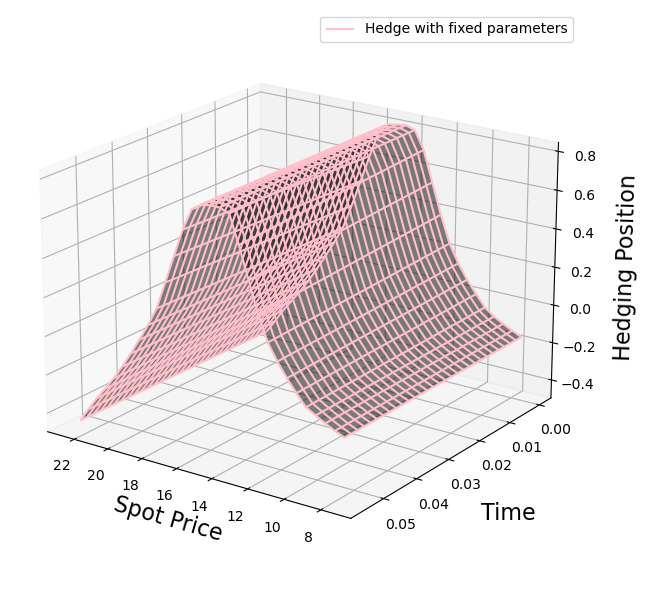

In [17]:
nr_discrete_points = 30
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
grid_fix = np.zeros((nr_discrete_points,nr_discrete_points))
for i in range(len(times)):
    for j in range(len(values)):
        grid_fix[i,j] = hedge_fix([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]


X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y , grid_fix,color = "black",alpha = 0.5)
ax.plot_wireframe(X, Y , grid_fix,color = "pink",label = "Hedge with fixed parameters")

ax.view_init(20,125)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.legend()
plt.tight_layout()
plt.show()

Compare the hedge strategies

In [18]:
style.use('ggplot')
BATCH_SIZE = 50000
t_k = np.linspace(0,T,n+1)


path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated_fix = [hedge_fix([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S_fix = tf.reduce_sum([hedge_evaluated_fix[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch_fix = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])


path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)]) 

C:\Users\User\AppData\Local\Temp\ipykernel_3212\2110378740.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


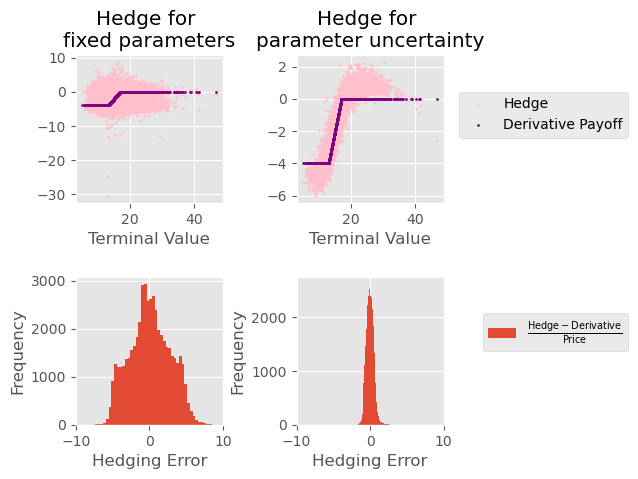

In [19]:
style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5,wspace = 0.5,right=0.7)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price_fix + delta_S_fix,(BATCH_SIZE,1)),
            color = "pink",label = "Hedge",s=2)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "purple",label = "Derivative Payoff",s=2)
axs[0,0].set_xlabel("Terminal Value")
axs[0,0].set_title("Hedge for \nfixed parameters")
axs[0,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "pink",label = "Hedge",s=2)
axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "purple",label = "Derivative",s=2)
axs[0,1].set_xlabel("Terminal Value")
axs[0,1].set_title("Hedge for \nparameter uncertainty")

hedging_error_fix = ((price_fix + delta_S_fix) - derivative_on_batch).numpy()
axs[1,0].hist(hedging_error_fix,100,label = r"$\frac{\mathrm{Hedge}-\mathrm{Derivative}}{\mathrm{Price}}$")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_xlim([-10,10])
axs[1,0].set_xlabel("Hedging Error")
axs[1,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
axs[1,1].hist(hedging_error,100)
axs[1,1].set_xlabel("Hedging Error")
axs[1,1].set_xlim([-10,10])
axs[1,1].set_ylabel("Frequency")
fig.show()

Adjusted Histogram: Difference between hedging errors

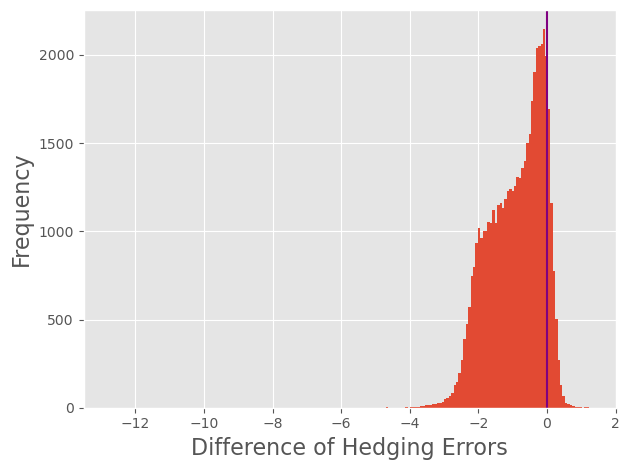

In [20]:
hedging_difference = np.abs(hedging_error_fix)/price_fix - np.abs(hedging_error)/price
plt.hist(hedging_difference,200)
plt.axvline(x=0,color="purple")

plt.xlabel("Difference of Hedging Errors", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

plt.tight_layout()
plt.show()

## Statistics on Hedging Errors

Hedging Error of the non-robust strategy.

In [21]:
print("Price of the fix hedge: {}".format(price_fix))
print("Price of the robust hedge: {}".format(price))

Price of the fix hedge: -2.0575246810913086
Price of the robust hedge: -2.1860179901123047


## Statistics on Absolute Hedging Errors

Hedging Error of the fix strategy.

In [22]:
pd.DataFrame(np.abs(hedging_error_fix)).describe()

,0
count,50000.000000
mean,2.241093
std,1.600769
min,0.000005
25%,0.851228
50%,1.956303
75%,3.493593
max,26.530830


Hedging Error of the robust strategy.

In [23]:
pd.DataFrame(np.abs(hedging_error)).describe()

,0
count,50000.000000
mean,0.405379
std,0.307864
min,0.000024
25%,0.168158
50%,0.346350
75%,0.577725
max,4.026418


## Statistics on Relative Hedging Errors

In [24]:
pd.DataFrame(np.abs(hedging_error_fix)/price_fix).describe()

,0
count,50000.000000
mean,-1.089224
std,0.778006
min,-12.894538
25%,-1.697959
50%,-0.950804
75%,-0.413714
max,-0.000002


In [25]:
pd.DataFrame(np.abs(hedging_error)/price).describe()

,0
count,50000.000000
mean,-0.185441
std,0.140833
min,-1.841896
25%,-0.264282
50%,-0.158439
75%,-0.076924
max,-0.000011
